In [5]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-contrib-python


Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 
import os

In [9]:
base_dir = '/Users/yuktadandekar/Downloads/flowers/'

img_size = 224
batch = 64

In [10]:
# Create a data augmentor 
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, 
								zoom_range=0.2, horizontal_flip=True, 
								validation_split=0.2) 

test_datagen = ImageDataGenerator(rescale=1. / 255, 
								validation_split=0.2) 

# Create datasets 
train_datagen = train_datagen.flow_from_directory(base_dir, 
												target_size=( 
													img_size, img_size), 
												subset='training', 
												batch_size=batch) 
test_datagen = test_datagen.flow_from_directory(base_dir, 
												target_size=( 
													img_size, img_size), 
												subset='validation', 
												batch_size=batch) 


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [11]:
# # modelling starts using a CNN. 

model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', 
				activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 


model.add(Conv2D(filters=64, kernel_size=(3, 3), 
				padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 


model.add(Conv2D(filters=64, kernel_size=(3, 3), 
				padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
				padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(5, activation="softmax")) 


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,541,253 (24.95 MB)

 Trainable params: 6,541,253 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


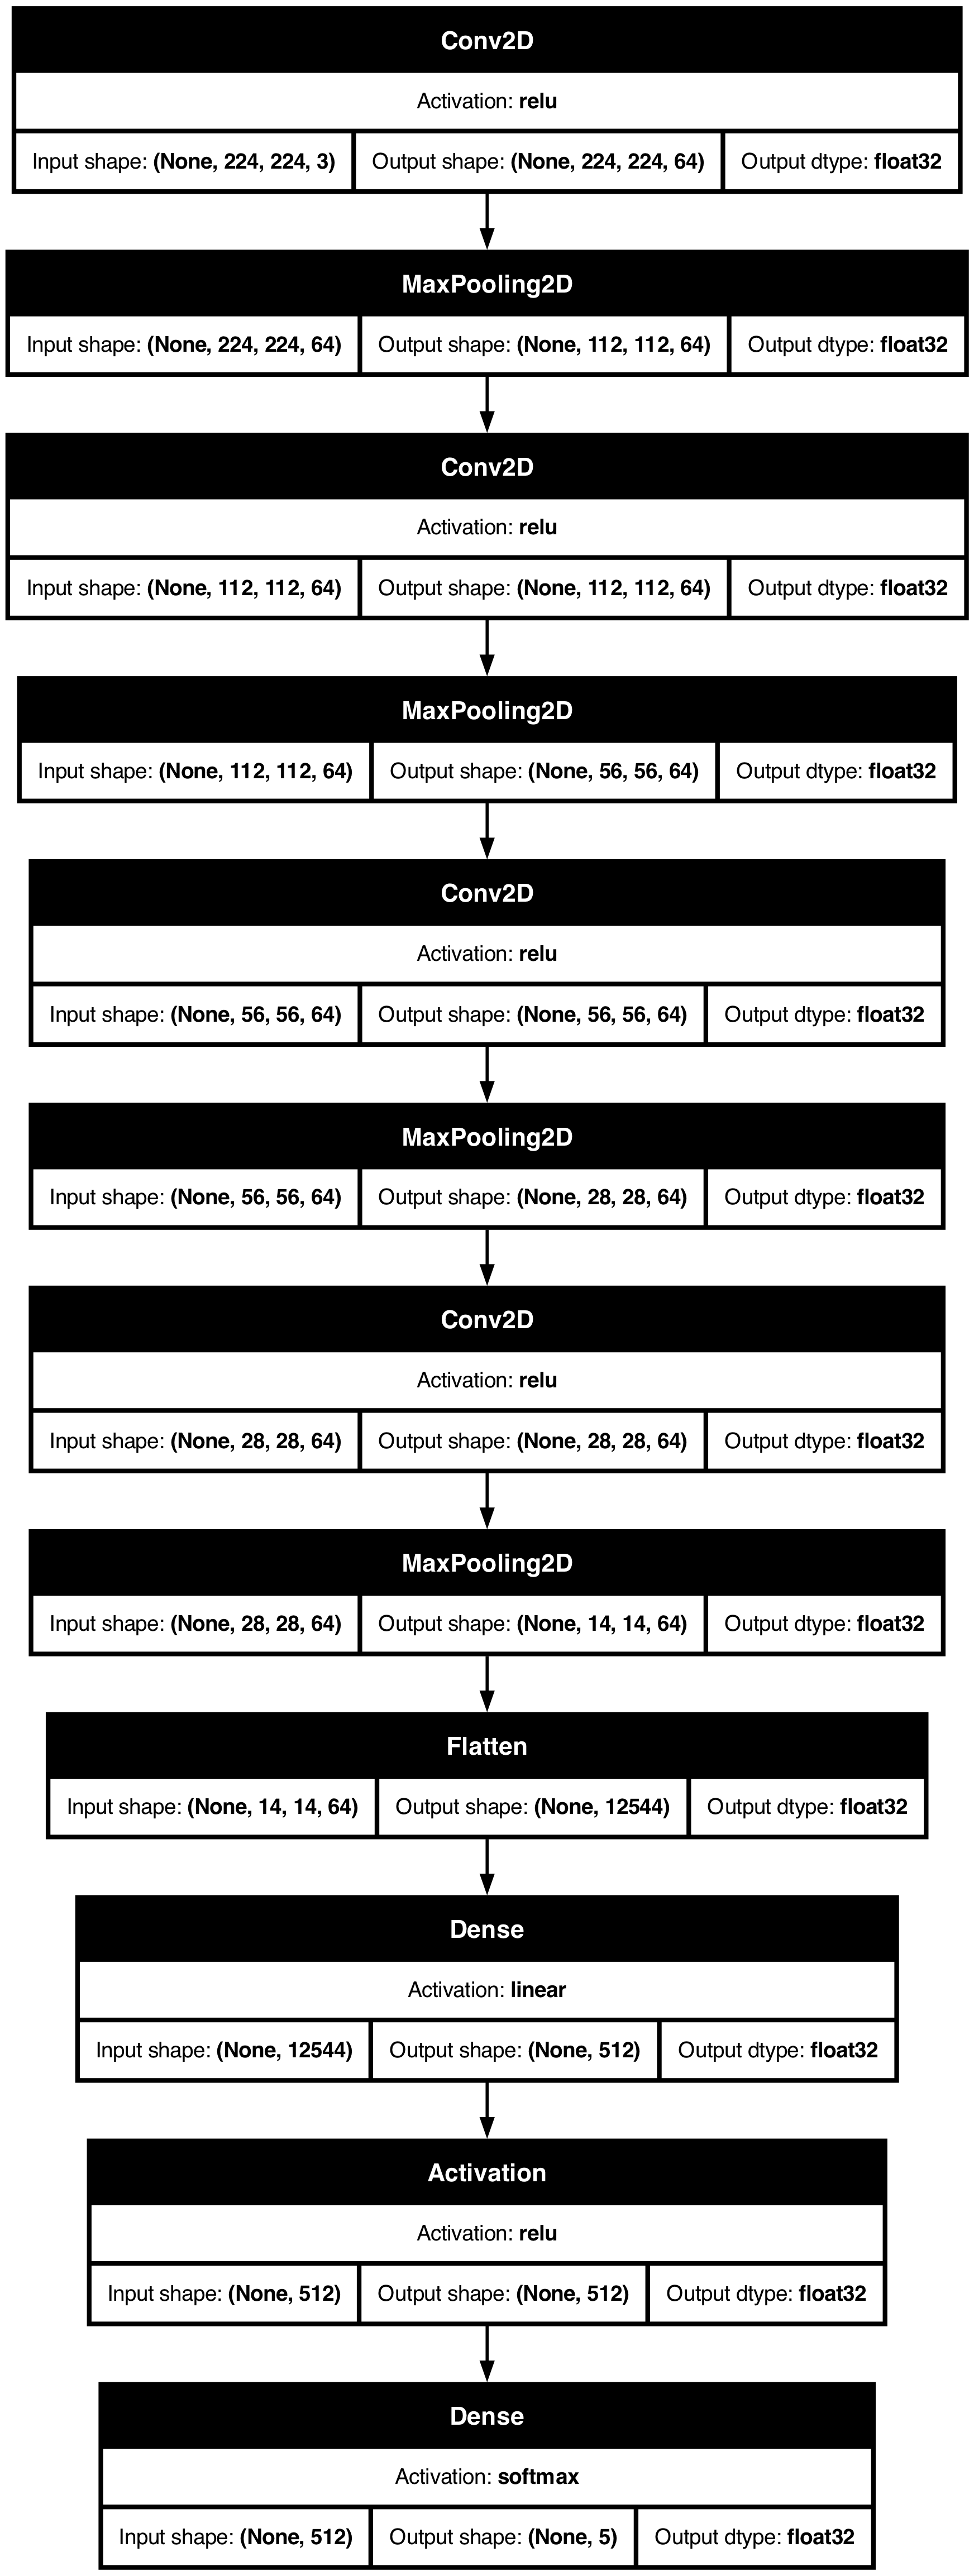

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
			loss='categorical_crossentropy', metrics=['accuracy']) 


In [28]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 451s 8s/step - accuracy: 0.3266 - loss: 1.5533 - val_accuracy: 0.4849 - val_loss: 1.1936
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 340s 6s/step - accuracy: 0.5351 - loss: 1.1319 - val_accuracy: 0.5174 - val_loss: 1.1541
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 267s 5s/step - accuracy: 0.5499 - loss: 1.1238 - val_accuracy: 0.5628 - val_loss: 1.1044
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.6107 - loss: 0.9784 - val_accuracy: 0.5756 - val_loss: 1.0624
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 302s 5s/step - accuracy: 0.6645 - loss: 0.8680 - val_accuracy: 0.6581 - val_loss: 0.9243
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 290s 5s/step - accuracy: 0.6787 - loss: 0.8245 - val_accuracy: 0.6709 - val_loss: 0.8408
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 727s 13s/step - accuracy: 0.7118 - loss: 0.7523 - val_accuracy: 0.6442 - val_loss: 0.9096
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 289s 5s/step - accuracy: 0.6508 - loss: 0.8806 - val_accuracy: 0.6407 - val_loss: 0

In [30]:
from tensorflow.keras.models import load_model 
model.save('Model.h5') 

# load model 
savedModel=load_model('Model.h5')

In [32]:
train_datagen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
[[1. 0. 0. 0. 0.]]
Daisy


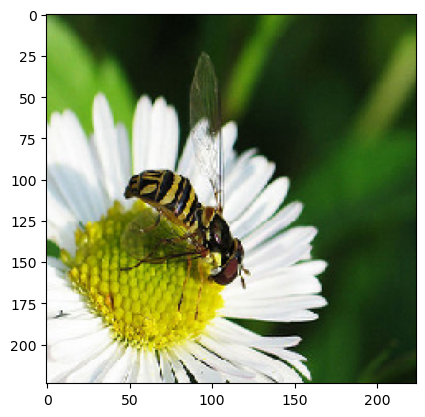

In [43]:
from keras.preprocessing import image 

#Creating list for mapping 
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip'] 

#Input image 
test_image = image.load_img('/Users/yuktadandekar/Downloads/flowers/daisy/5547758_eea9edfd54_n.jpg',target_size=(224,224)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = savedModel.predict(test_image) 
print(result) 

#Mapping result array with the main name list 
i=0
for i in range(len(result[0])):
    if(result[0][i]==1):
        print(list_[i])
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
[[0. 0. 1. 0. 0.]]
Rose


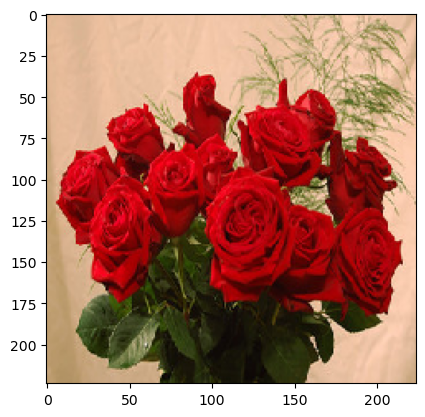

In [50]:
#Input image 
test_image = image.load_img('/Users/yuktadandekar/Downloads/flowers/rose/2265390547_2409007cef_n.jpg',target_size=(224,224)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = savedModel.predict(test_image) 
print(result) 

#Mapping result array with the main name list 
i=0
for i in range(len(result[0])):
    if(result[0][i]==1):
        print(list_[i])
        break
